In [94]:
import pandas as pd

# Load true news dataset
true_df = pd.read_csv('/content/True.csv')

# Load fake news dataset
fake_df = pd.read_csv('/content/Fake.csv')

# Add labels to indicate true and fake news
true_df['label'] = 1
fake_df['label'] = 0

# Concatenate the two datasets
df = pd.concat([true_df, fake_df], ignore_index=True)

# Shuffle the combined dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [95]:
pip install streamlit


In [96]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization
df['tokens'] = df['text'].apply(word_tokenize)

# Removing stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Stemming
ps = PorterStemmer()
df['stemmed_tokens'] = df['tokens'].apply(lambda x: [ps.stem(word) for word in x])

# Vectorization
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['stemmed_tokens'].apply(lambda x: ' '.join(x)))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


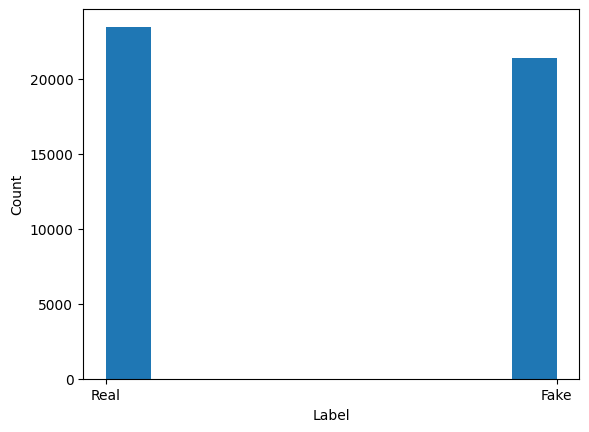

In [97]:
import matplotlib.pyplot as plt

# Plot distribution of fake vs real news
plt.hist(df['label'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Real', 'Fake'])
plt.show()


In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming df is your DataFrame containing the data

# Split the data into features (X) and target (y)
X = df['text']  # Assuming 'text' is the column containing the text data
y = df['label']  # Assuming 'label' is the column containing the target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Evaluate the model
accuracy = lr_model.score(X_test_tfidf, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9865256124721603


In [119]:
!ls /content/sample_data/


fake_news_detection.py	fake_news.py	mnist_train_small.csv  vectorizer.pkl
fake_news_model.pkl	mnist_test.csv	README.md


In [118]:
from google.colab import files

uploaded = files.upload()


Saving fake_news_detection.py to fake_news_detection.py


In [120]:
print("X_train_tfidf shape:", X_train_tfidf.shape)
print("y_train shape:", y_train.shape)


X_train_tfidf shape: (35918, 111438)
y_train shape: (35918,)


In [133]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Construct the absolute path of the model file
model_file_name = 'fake_news_detection_model.pkl'
model_absolute_path = os.path.join(current_directory, model_file_name)

# Print the absolute path of the model file
print("Absolute path of the model file:", model_absolute_path)


Absolute path of the model file: /content/sample_data/fake_news_detection_model.pkl


In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import joblib

# Sample data
texts = ["This is a sample text.", "Another sample text."]
labels = [0, 1]

# Create and fit the vectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(texts)

# Create and fit the model
lr_model = LogisticRegression()
lr_model.fit(X, labels)

# Save the vectorizer and model
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(lr_model, 'fake_news_detection_model.pkl')


['fake_news_detection_model.pkl']

In [152]:
import streamlit as st
import joblib
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the saved model and vectorizer
lr_model = joblib.load('/content/sample_data/fake_news_detection_model.pkl')
tfidf_vectorizer = joblib.load('/content/sample_data/tfidf_vectorizer.pkl')

# Define preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and non-alphanumeric characters
    text = re.sub(r'\W', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text

# Define prediction function
def predict_fake_news(sentence):
    # Preprocess the input sentence
    preprocessed_sentence = preprocess_text(sentence)
    # Vectorize the preprocessed sentence
    vectorized_sentence = tfidf_vectorizer.transform([preprocessed_sentence])
    # Predict using the logistic regression model
    prediction = lr_model.predict(vectorized_sentence)
    return prediction

# Streamlit app
def main():
    st.title('Fake News Detection App')
    # User input
    sentence = st.text_input('Enter a sentence:')
    # Make prediction when user clicks the button
    if st.button('Predict'):
        prediction = predict_fake_news(sentence)
        if prediction[0] == 0:
            st.write('Fake News')
        else:
            st.write('Real News')

if __name__ == '__main__':
    main()


In [153]:
!pip install streamlit pyngrok


In [154]:
!ngrok config 2hK3yVwSEUhBJmkkUjp7lB8zqoG_6pZv1dmetD6NnAZ6G5h5B




NAME:
  config - update or migrate ngrok's configuration file

USAGE:
  ngrok config [flags]

DESCRIPTION: 
  The config command gives a quick way to create or update ngrok's configuration
  file. Use 'add-authtoken' or 'add-api-key' to set the corresponding properties.

  Use 'check' to test a configuration file for validity. If you have an old
  configuration file, you can also use 'upgrade' to automatically migrate to the
  latest version.

COMMANDS:
  add-api-key                    save api key to configuration file
  add-authtoken                  save authtoken to configuration file
  add-server-addr                adds the server address (server_addr) to configuration file for custom agent ingress
  check                          check configuration file
  edit                           edit configuration file
  upgrade                        auto-upgrade configuration file

OPTIONS:
      --config strings   path to config files; they are merged if multiple
  -h, --help         

In [ ]:
from pyngrok import ngrok
import time

# Terminate open tunnels if any exist
ngrok.kill()
# Create a new ngrok tunnel
public_url = ngrok.connect(8501)
print(f"Streamlit app running at: {public_url}")

# Small delay to ensure ngrok is fully set up
time.sleep(5)

# Run the Streamlit app
!streamlit run /content/sample_data/fake_news_detection.py --server.port 8501


Streamlit app running at: NgrokTunnel: "https://d6ca-34-147-36-75.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.147.36.75:8501

